# Analyse Exploratoire du fichier myreport_ping_full.csv

### Imports (fichier & modules)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [51]:
tab = pd.read_csv('../data/logServer/myreport_ping_full.csv',sep=',')

### Le fichier myreport_ping_full.csv : taille, colonnes

In [53]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  14  colonnes dans le data frame


In [54]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Temps du ping',
       'Temps du ping(RAW)', 'Minimum', 'Minimum(RAW)', 'Maximum',
       'Maximum(RAW)', 'Perte de paquets', 'Perte de paquets(RAW)',
       'Temps mort', 'Temps mort(RAW)', 'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [55]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date et heure          2882 non-null   object 
 1   Date et heure(RAW)     2881 non-null   float64
 2   Temps du ping          2195 non-null   object 
 3   Temps du ping(RAW)     2194 non-null   float64
 4   Minimum                2195 non-null   object 
 5   Minimum(RAW)           2194 non-null   float64
 6   Maximum                2195 non-null   object 
 7   Maximum(RAW)           2194 non-null   float64
 8   Perte de paquets       2186 non-null   object 
 9   Perte de paquets(RAW)  2194 non-null   float64
 10  Temps mort             2195 non-null   object 
 11  Temps mort(RAW)        2194 non-null   float64
 12  Couverture             2882 non-null   object 
 13  Couverture(RAW)        2881 non-null   float64
dtypes: float64(7), object(7)
memory usage: 315.3+ KB


On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [57]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure            2882
Date et heure(RAW)       2881
Temps du ping              10
Temps du ping(RAW)        418
Minimum                     3
Minimum(RAW)                5
Maximum                    36
Maximum(RAW)              400
Perte de paquets            2
Perte de paquets(RAW)       3
Temps mort                  1
Temps mort(RAW)             1
Couverture                  3
Couverture(RAW)             2
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [59]:
tab.head()


,Date et heure,Date et heure(RAW),Temps du ping,Temps du ping(RAW),Minimum,Minimum(RAW),Maximum,Maximum(RAW),Perte de paquets,Perte de paquets(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,1 ms,0.7333,0 ms,0.0,3 ms,2.7667,0 %,0.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,0 ms,0.0033,0 ms,0.0,0 ms,0.0167,0 %,0.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,0 ms,0.0000,0 ms,0.0,0 ms,0.0000,0 %,0.0,0 %,0.0,100 %,10000.0


### Suppression des valeurs NaN

In [61]:
num_deleted = tab.shape[0]
tab.dropna(inplace=True)
num_deleted -= tab.shape[0]

print(f"Number of rows deleted: {num_deleted}")

Number of rows deleted: 696


### Transformation des dates

In [63]:
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, epoch=datetime(1900, 1, 1)):
    # Adapted from above, thanks to @Martijn Pieters 

    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    inDays = int(ordinal)
    frac = ordinal - inDays
    inSecs = int(round(frac * 86400.0))

    return epoch + timedelta(days=inDays - 1, seconds=inSecs) # epoch is day 1

excelDT = 42548.75001           # Float representation of 27/06/2016  6:00:01 PM in Excel format  
pyDT = from_excel_ordinal(excelDT)
print(pyDT)

2016-06-27 18:00:01


In [64]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['date_full'] = tab['Date et heure(RAW)'].apply(from_excel_ordinal)

# Extraire la date et l'heure sous forme de colonnes séparées
tab['date'] = tab['date_full'].dt.strftime("%Y-%m-%d")  # Format YY-MM-DD
tab['heure'] = tab['date_full'].dt.strftime("%H")  # Format HH

In [65]:
tab.head()


,Date et heure,Date et heure(RAW),Temps du ping,Temps du ping(RAW),Minimum,Minimum(RAW),Maximum,Maximum(RAW),Perte de paquets,Perte de paquets(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW),date_full,date,heure
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,1 ms,0.7333,0 ms,0.0,3 ms,2.7667,0 %,0.0,0 %,0.0,100 %,10000.0,2024-08-13 01:00:00,2024-08-13,01
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,0 ms,0.0033,0 ms,0.0,0 ms,0.0167,0 %,0.0,0 %,0.0,100 %,10000.0,2024-08-13 02:00:00,2024-08-13,02
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,0 ms,0.0000,0 ms,0.0,0 ms,0.0000,0 %,0.0,0 %,0.0,100 %,10000.0,2024-08-13 03:00:00,2024-08-13,03
5,13/08/2024 05:00:00 - 06:00:00,45517.166667,3 ms,2.9267,0 ms,0.0,15 ms,14.6167,0 %,0.0,0 %,0.0,100 %,10000.0,2024-08-13 04:00:00,2024-08-13,04
6,13/08/2024 06:00:00 - 07:00:00,45517.208333,5 ms,4.6067,0 ms,0.0,23 ms,23.0333,0 %,0.0,0 %,0.0,100 %,10000.0,2024-08-13 05:00:00,2024-08-13,05


### Réagencement et Suppression des colonnes

In [67]:
# déplacement des nouvelles colonnes de date/heure à gauche
cols = tab.columns  # Liste des colonnes
tab = tab[cols[-3:].tolist() + cols[:-3].tolist()]

In [68]:
# renommage des colonnes
tab.rename(columns={"Temps du ping(RAW)": "Temps du ping(ms)"}, inplace=True)
tab.rename(columns={"Minimum(RAW)": "Minimum ping (ms)"}, inplace=True)
tab.rename(columns={"Maximum(RAW)": "Maximum ping (ms)"}, inplace=True)
tab.rename(columns={"Perte de paquets(RAW)": "Perte de paquets (ping)(%)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort ping (%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture ping(%)"}, inplace=True)

# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure"])
tab = tab.drop(columns=["Temps du ping"])
tab = tab.drop(columns=["Minimum"])
tab = tab.drop(columns=["Maximum"])
tab = tab.drop(columns=["Perte de paquets"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])


In [69]:
tab.head()

,date_full,date,heure,Date et heure(RAW),Temps du ping(ms),Minimum ping (ms),Maximum ping (ms),Perte de paquets (ping)(%),Temps mort ping (%),Couverture ping(%)
2,2024-08-13 01:00:00,2024-08-13,01,45517.041667,0.7333,0.0,2.7667,0.0,0.0,10000.0
3,2024-08-13 02:00:00,2024-08-13,02,45517.083333,0.0033,0.0,0.0167,0.0,0.0,10000.0
4,2024-08-13 03:00:00,2024-08-13,03,45517.125000,0.0000,0.0,0.0000,0.0,0.0,10000.0
5,2024-08-13 04:00:00,2024-08-13,04,45517.166667,2.9267,0.0,14.6167,0.0,0.0,10000.0
6,2024-08-13 05:00:00,2024-08-13,05,45517.208333,4.6067,0.0,23.0333,0.0,0.0,10000.0


In [70]:
print(type(tab["date_full"].iloc[0])) #vérifier le typage de date_full

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Analyse temporelle

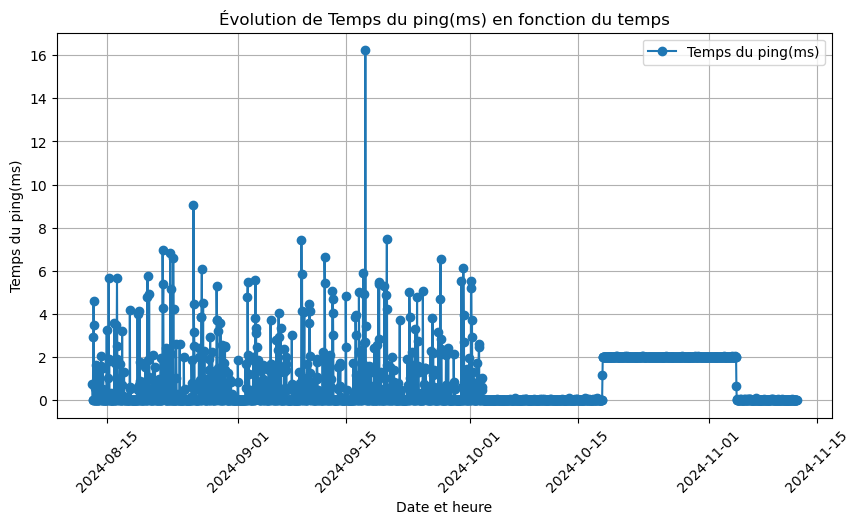

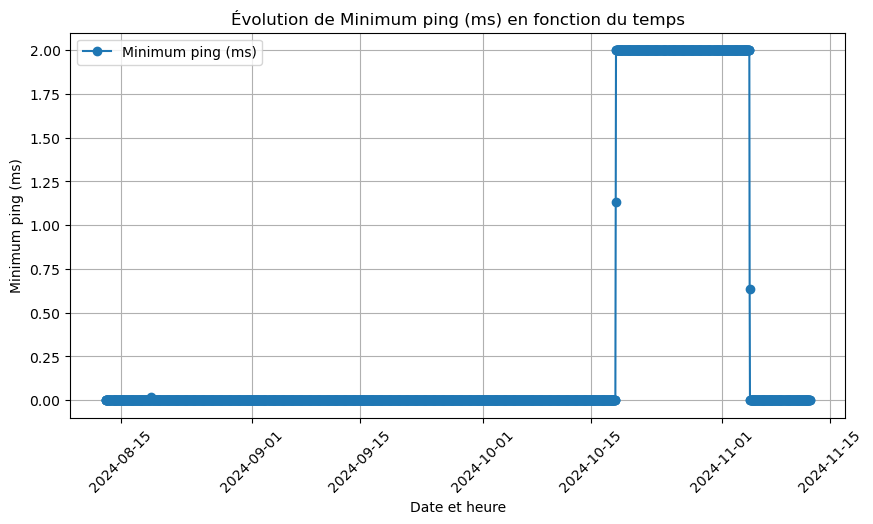

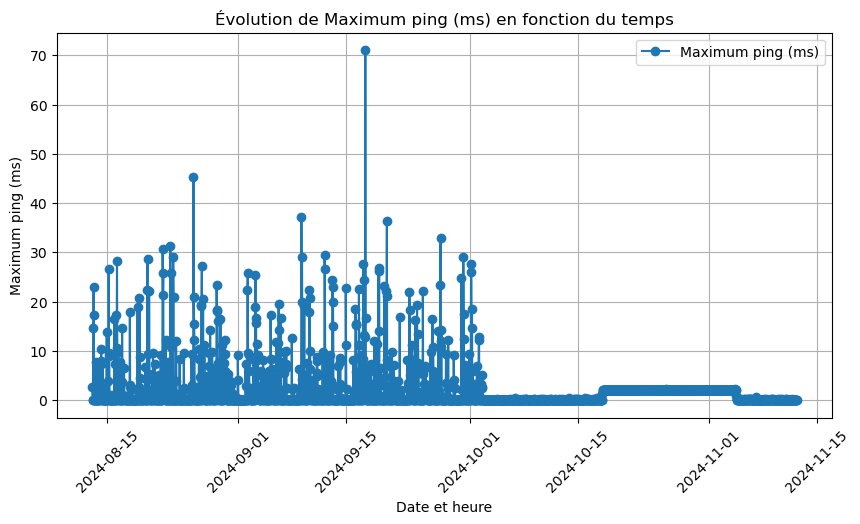

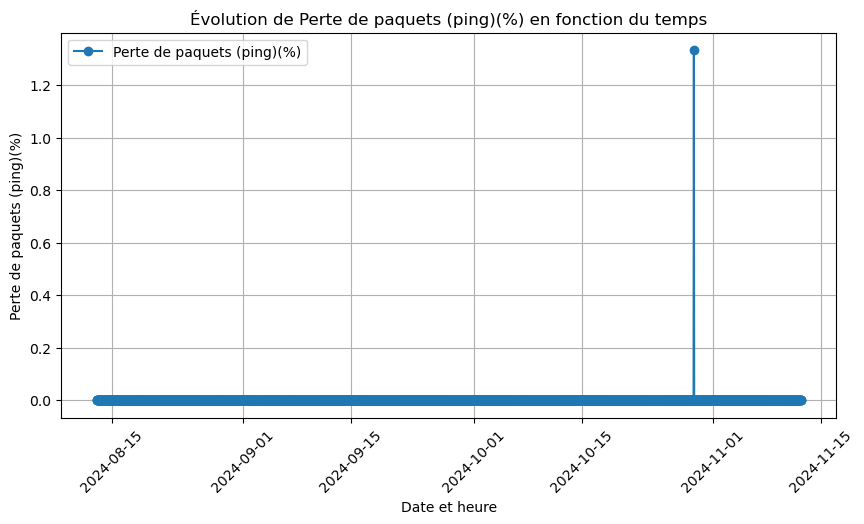

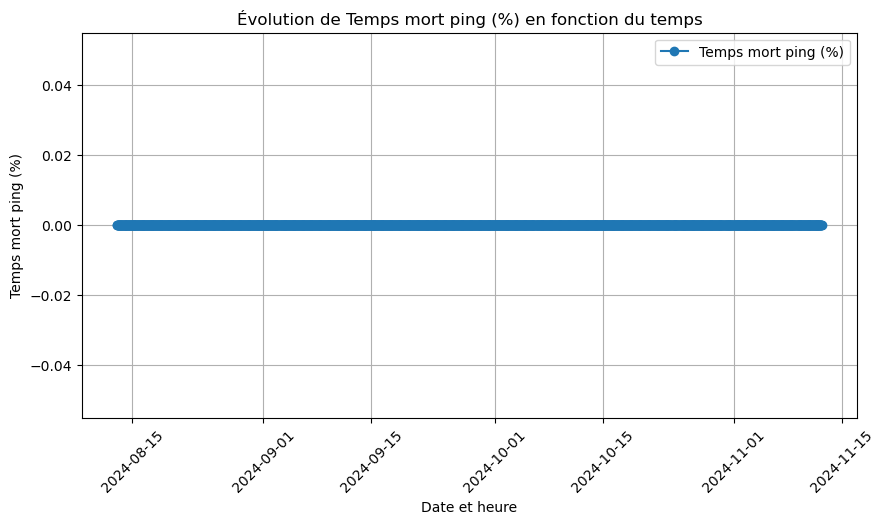

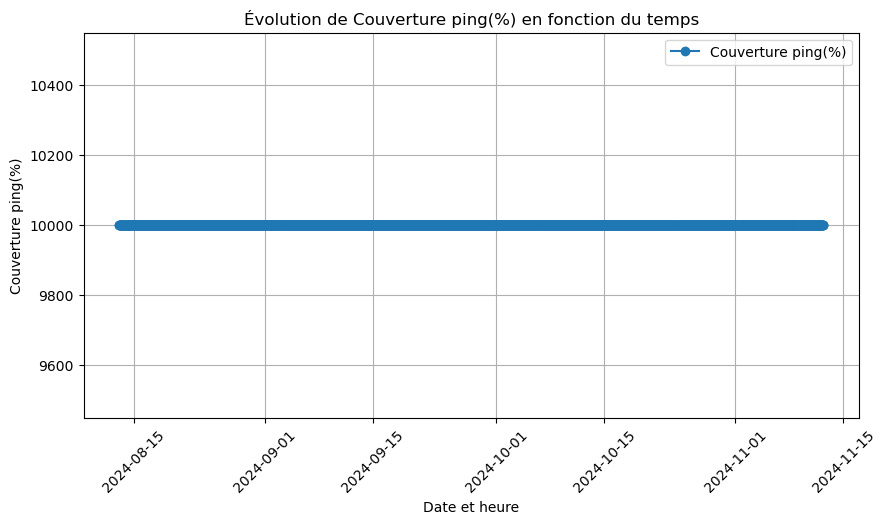

In [72]:
# Vérifier que 'date_full' est bien au format datetime
tab["date_full"] = pd.to_datetime(tab["date_full"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["date_full"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

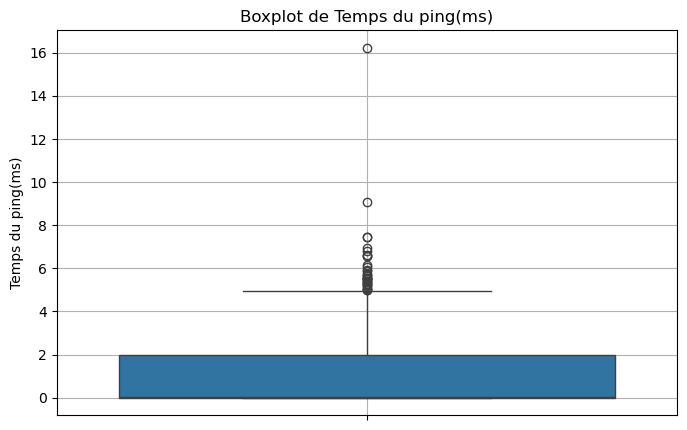

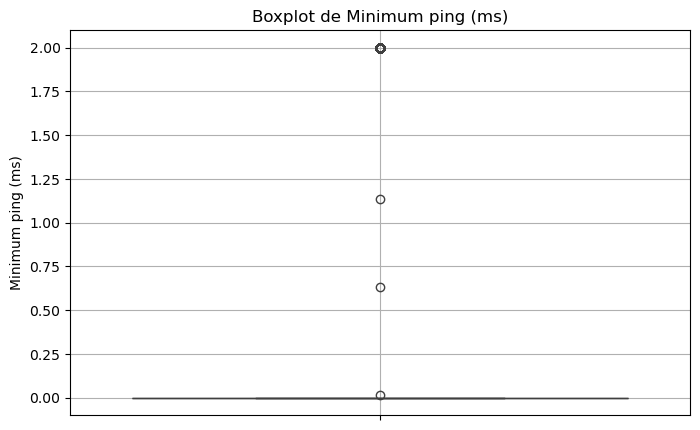

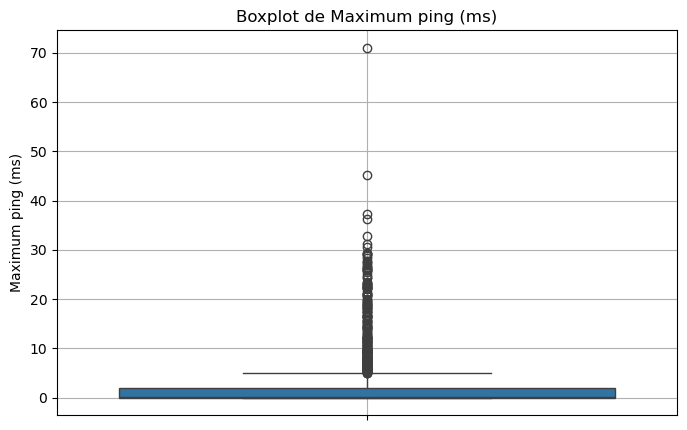

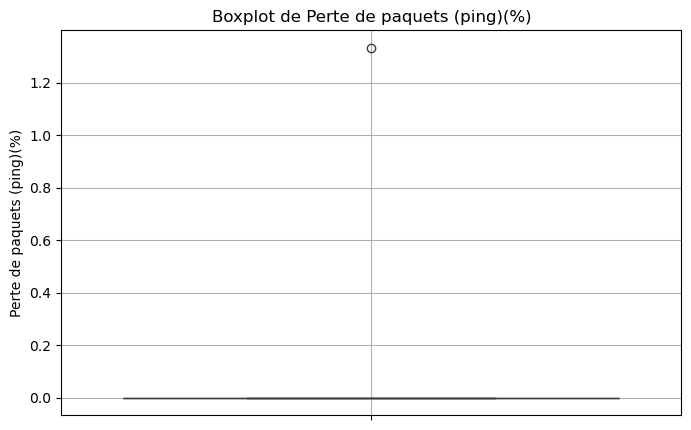

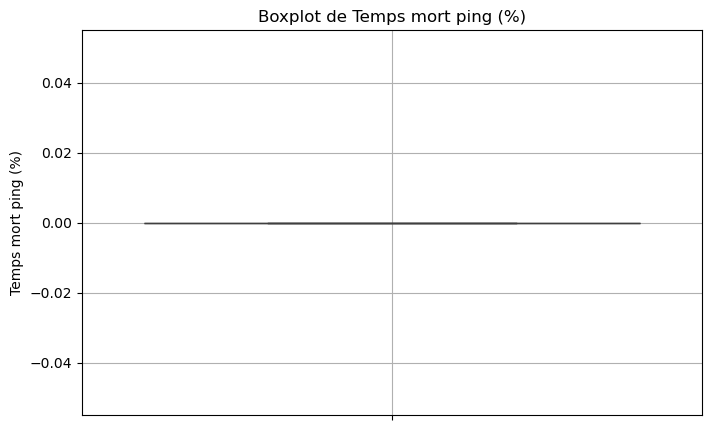

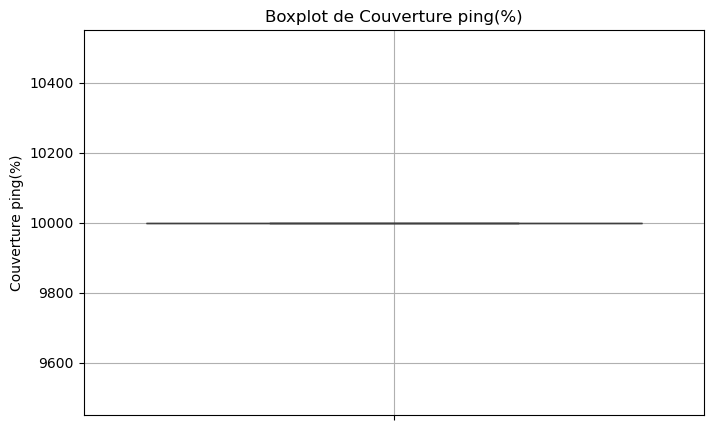

In [73]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

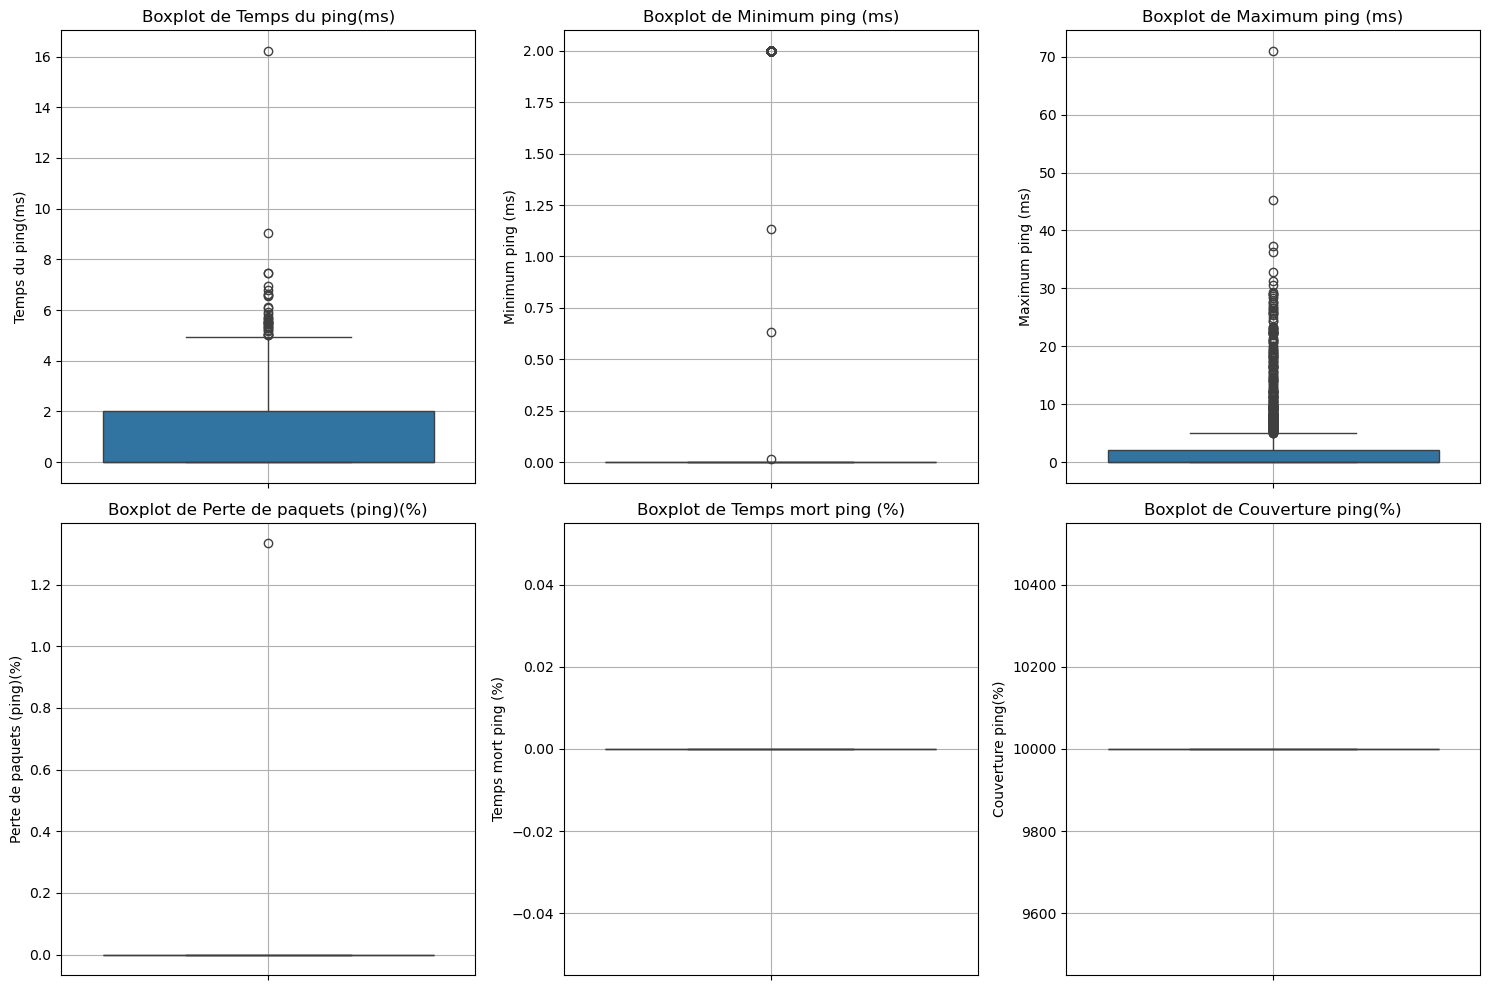

In [74]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [76]:
tab = tab.drop(columns=["Couverture ping(%)"])
tab = tab.drop(columns=["Temps mort ping (%)"])
tab = tab.drop(columns=["Minimum ping (ms)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [78]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_ping_filtered.csv", index=False, encoding='utf-8')